<a href="https://colab.research.google.com/github/GyanGartia/Machine-Learning/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt 
from sklearn import preprocessing

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split 

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
# reading csv file
data = pd.read_csv('SET_3_Dia.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Preprocessing and EDA

In [ ]:
#dropping nan values
data = data.dropna()

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#know the null value:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [ ]:
#unique values in each column
uniq = data.nunique()
print(uniq)

Pregnancies       17
Glucose          136
BloodPressure     47
SkinThickness     51
Insulin          186
BMI              248
Pedigree         517
Age               52
Outcome            2
dtype: int64


In [ ]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Visualizing dataset

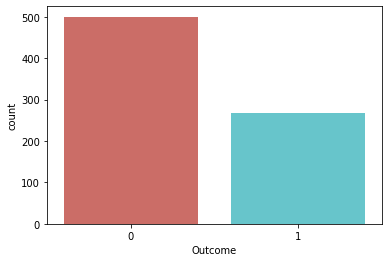

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot count of categorical values of outcome column
sns.countplot(x='Outcome',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [ ]:
# sort by correlation
data.corr()['Outcome'].sort_values()

BloodPressure    0.065068
SkinThickness    0.074752
Insulin          0.130548
Pedigree         0.173844
Pregnancies      0.221898
Age              0.238356
BMI              0.292695
Glucose          0.466581
Outcome          1.000000
Name: Outcome, dtype: float64

**LOGISTIC REGRESSION ON DIABETES DATASET:**

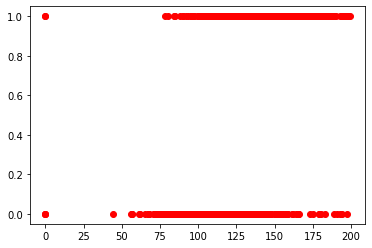

In [ ]:
# scatter plot for outcome vs glucose
plt.scatter(data.Glucose, data.Outcome, color = 'red')

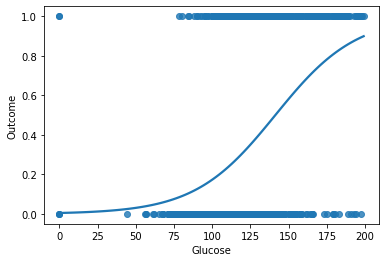

In [ ]:
# visualizing
sns.regplot(x=data.Glucose, y=data.Outcome, data=data, logistic=True, ci=None)

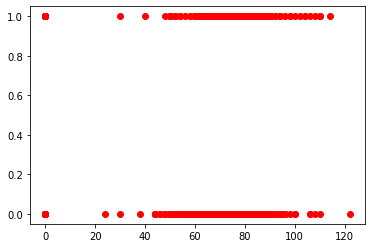

In [ ]:
# scatter plot for outcome vs glucose
plt.scatter(data.BloodPressure, data.Outcome, color = 'red')

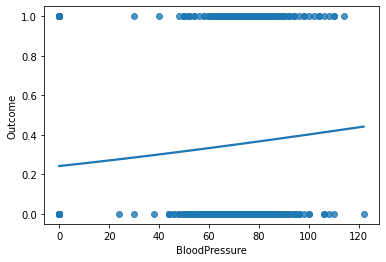

In [ ]:
# visualizing
sns.regplot(x=data.BloodPressure, y=data.Outcome, data=data, logistic=True, ci=None)

In [ ]:
target = data.Outcome
inputs = data.drop('Outcome', axis='columns')

Before normalizing the dataset

In [ ]:
# dividing dataset into training data and testing data 70-30
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.3)

#training our model
model = LogisticRegression()
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#model score
model.score(x_test, y_test)

# confusion matrix and report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[133  26]
 [ 25  47]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       159
           1       0.64      0.65      0.65        72

    accuracy                           0.78       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.78      0.78      0.78       231



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


After normalizing the dataset with standard scaler method

In [ ]:
#standardization of data
scaler = StandardScaler()

t_df = data.drop(['Outcome'], axis =1)

#fitting dataset to scaler by removing the attribute output
scaler.fit(t_df)

scaled_features = scaler.transform(t_df)
inputs = pd.DataFrame(scaled_features,columns=data.columns[:-1])
inputs.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [ ]:
# dividing dataset into training data and testing data 70-30
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.3)

#training our model
model = LogisticRegression()
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#model score
model.score(x_test, y_test)

# confusion matrix and report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[131  15]
 [ 39  46]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       146
           1       0.75      0.54      0.63        85

    accuracy                           0.77       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



Before normalizing model accuracy was 74%.  

After normalizing model accuraccyis 86%.




**SVM ON DIABETES DATASET:**

In [ ]:
# reading csv file
data = pd.read_csv('SET_3_Dia.csv')

In [ ]:
target = data.Outcome
inputs = data.drop('Outcome', axis='columns')

In [ ]:
# plt.scatter(inputs['Glucose'], inputs['BloodPressure'], color = 'g')
# plt.xlabel("Glucose")
# plt.ylabel("BloodPressure")

# plt.show()
# plt.clf()

Before normalizing

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(inputs, target, test_size=0.3)

# svc_model = SVC()
svc_model = SVC(kernel='linear')
svc_model.fit(x_train, y_train)

# make predictions
y_pred = svc_model.predict(x_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       142
           1       0.82      0.57      0.68        89

    accuracy                           0.79       231
   macro avg       0.80      0.75      0.76       231
weighted avg       0.79      0.79      0.78       231

[[131  11]
 [ 38  51]]


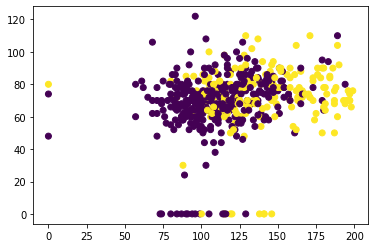

In [ ]:
plt.scatter(x_train["Glucose"], x_train["BloodPressure"], c = y_train)

In [ ]:
# plt.scatter(x_train["Glucose"], x_train["BloodPressure"], c=y_train)
# ax = plt.gca()
# xlim = ax.get_xlim()

# ax.scatter(x_test["Glucose"], x_test["BloodPressure"], c=y_test, marker = 's')

# w = svc_model.coef_["Glucose"]
# a = -w["Glucose"] / w["BloodPressure"]
# xx = np.linspace(xlim["Glucose"], xlim["BloodPressure"])
# yy = a * xx - (svc_model.intercept_["Glucose"] / w["BloodPressure"])
# plt.plot(xx,yy)
# plt.show()

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(inputs, target, test_size=0.3)

# svc_model = SVC()
svc_model = SVC(kernel='rbf')
svc_model.fit(x_train, y_train)

# make predictions
y_pred = svc_model.predict(x_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83       145
           1       0.85      0.41      0.55        86

    accuracy                           0.75       231
   macro avg       0.79      0.68      0.69       231
weighted avg       0.78      0.75      0.73       231

[[139   6]
 [ 51  35]]


normalizing using standard scaler mthod

In [ ]:
#standardization of data
scaler = StandardScaler()

t_df = data.drop(['Outcome'], axis =1)

#fitting dataset to scaler by removing the attribute output
scaler.fit(t_df)

scaled_features = scaler.transform(t_df)
inputs = pd.DataFrame(scaled_features,columns=data.columns[:-1])
inputs.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


After normalizing model building and classification

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(inputs, target, test_size=0.3)

# svc_model = SVC()
svc_model = SVC(kernel='linear')
svc_model.fit(x_train, y_train)

# make predictions
y_pred = svc_model.predict(x_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       150
           1       0.77      0.59      0.67        81

    accuracy                           0.80       231
   macro avg       0.79      0.75      0.76       231
weighted avg       0.79      0.80      0.79       231

[[136  14]
 [ 33  48]]


In [ ]:
x_train, x_test, y_train, y_test=train_test_split(inputs, target, test_size=0.3)

# svc_model = SVC()
svc_model = SVC(kernel='rbf')
svc_model.fit(x_train, y_train)

# make predictions
y_pred = svc_model.predict(x_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       156
           1       0.69      0.64      0.66        75

    accuracy                           0.79       231
   macro avg       0.76      0.75      0.75       231
weighted avg       0.78      0.79      0.79       231

[[134  22]
 [ 27  48]]


using linear:


*   before normaliation: 75%
*   after normalization: 78%



using RBF:


*   before normaliztion: 74%
*   after normalization: 76%

